# MIS 548 Group Project 
### Group 9: Zachary Newland, Siddarth Gopalakrishnan, Sean Valerga, Pooja Veenu, Xiao Liang
### Dataset: NFL play-by-play data

In [1]:
# All Packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as ticker
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Player Dataset

In [2]:
# Import player dataset
player = pd.read_csv("player.csv", sep = ',')
player.head()

,nflId,season,teamId,displayName,firstName,middleName,lastName,suffix,status,positionGroup,...,gsisId,homeTown,collegeId,collegeName,height,weight,headshot_url,profile_url,birthDate,jerseyNumber
0,182,2008,2120,Xavier Adibi,Xavier,Oyekola,Adibi,NaN,ACT,LB,...,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,232.0,http://static.nfl.com/static/content/public/st...,http://www.nfl.com/player/xavieradibi/182/profile,1984-10-18,52.0
1,182,2009,2120,Xavier Adibi,Xavier,Oyekola,Adibi,NaN,ACT,LB,...,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,242.0,http://static.nfl.com/static/content/public/st...,http://www.nfl.com/player/xavieradibi/182/profile,1984-10-18,52.0
2,182,2010,2120,Xavier Adibi,Xavier,Oyekola,Adibi,NaN,ACT,LB,...,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,242.0,http://static.nfl.com/static/content/public/st...,http://www.nfl.com/player/xavieradibi/182/profile,1984-10-18,52.0
3,182,2011,3000,Xavier Adibi,Xavier,Oyekola,Adibi,NaN,ACT,LB,...,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,242.0,http://static.nfl.com/static/content/public/st...,http://www.nfl.com/player/xavieradibi/182/profile,1984-10-18,57.0
4,182,2012,2100,Xavier Adibi,Xavier,Oyekola,Adibi,NaN,ACT,LB,...,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,242.0,http://static.nfl.com/static/content/public/st...,http://www.nfl.com/player/xavieradibi/182/profile,1984-10-18,58.0


In [3]:
#create data frame
player_df = pd.DataFrame(player)

In [4]:
# get basic information of dataframe
#Our dataset have 56175 rows and 22 columns before the data cleaning
display(player_df.shape)
# To see the top of our Data
display(player_df.head())
#To know what columns we have
display(player_df.columns)
#To know our data type of each variable
display(player_df.dtypes)
# Display overall observations
display(player_df.count())
# display summary of the table 
display(player_df.info())
# display summary statistics of the table
display(player_df.describe())

(56175, 22)

,nflId,season,teamId,displayName,firstName,middleName,lastName,suffix,status,positionGroup,...,gsisId,homeTown,collegeId,collegeName,height,weight,headshot_url,profile_url,birthDate,jerseyNumber
0,182,2008,2120,Xavier Adibi,Xavier,Oyekola,Adibi,NaN,ACT,LB,...,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,232.0,http://static.nfl.com/static/content/public/st...,http://www.nfl.com/player/xavieradibi/182/profile,1984-10-18,52.0
1,182,2009,2120,Xavier Adibi,Xavier,Oyekola,Adibi,NaN,ACT,LB,...,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,242.0,http://static.nfl.com/static/content/public/st...,http://www.nfl.com/player/xavieradibi/182/profile,1984-10-18,52.0
2,182,2010,2120,Xavier Adibi,Xavier,Oyekola,Adibi,NaN,ACT,LB,...,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,242.0,http://static.nfl.com/static/content/public/st...,http://www.nfl.com/player/xavieradibi/182/profile,1984-10-18,52.0
3,182,2011,3000,Xavier Adibi,Xavier,Oyekola,Adibi,NaN,ACT,LB,...,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,242.0,http://static.nfl.com/static/content/public/st...,http://www.nfl.com/player/xavieradibi/182/profile,1984-10-18,57.0
4,182,2012,2100,Xavier Adibi,Xavier,Oyekola,Adibi,NaN,ACT,LB,...,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,242.0,http://static.nfl.com/static/content/public/st...,http://www.nfl.com/player/xavieradibi/182/profile,1984-10-18,58.0


Index(['nflId', 'season', 'teamId', 'displayName', 'firstName', 'middleName',
       'lastName', 'suffix', 'status', 'positionGroup', 'position', 'esbId',
       'gsisId', 'homeTown', 'collegeId', 'collegeName', 'height', 'weight',
       'headshot_url', 'profile_url', 'birthDate', 'jerseyNumber'],
      dtype='object')

nflId              int64
season             int64
teamId             int64
displayName       object
firstName         object
middleName        object
lastName          object
suffix            object
status            object
positionGroup     object
position          object
esbId             object
gsisId            object
homeTown          object
collegeId          int64
collegeName       object
height            object
weight           float64
headshot_url      object
profile_url       object
birthDate         object
jerseyNumber     float64
dtype: object

nflId            56175
season           56175
teamId           56175
displayName      56175
firstName        56175
middleName       43810
lastName         56175
suffix            5642
status           41710
positionGroup    56175
position         56175
esbId            56175
gsisId           55514
homeTown         50502
collegeId        56175
collegeName      56175
height           56166
weight           56166
headshot_url     56175
profile_url      56175
birthDate        56074
jerseyNumber     52103
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56175 entries, 0 to 56174
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nflId          56175 non-null  int64  
 1   season         56175 non-null  int64  
 2   teamId         56175 non-null  int64  
 3   displayName    56175 non-null  object 
 4   firstName      56175 non-null  object 
 5   middleName     43810 non-null  object 
 6   lastName       56175 non-null  object 
 7   suffix         5642 non-null   object 
 8   status         41710 non-null  object 
 9   positionGroup  56175 non-null  object 
 10  position       56175 non-null  object 
 11  esbId          56175 non-null  object 
 12  gsisId         55514 non-null  object 
 13  homeTown       50502 non-null  object 
 14  collegeId      56175 non-null  int64  
 15  collegeName    56175 non-null  object 
 16  height         56166 non-null  object 
 17  weight         56166 non-null  float64
 18  headsh

None

,nflId,season,teamId,collegeId,weight,jerseyNumber
count,5.617500e+04,56175.000000,56175.000000,56175.000000,56166.000000,52103.000000
mean,2.299523e+06,2009.912274,2522.008011,4331.064619,245.224709,52.813907
std,6.828577e+05,5.872046,1391.438770,1929.911587,45.894048,28.149581
min,1.820000e+02,1999.000000,200.000000,0.000000,18.000000,0.000000
25%,2.501856e+06,2005.000000,1400.000000,1871.000000,205.000000,28.000000
50%,2.505828e+06,2010.000000,2310.000000,4852.000000,238.000000,54.000000
75%,2.535886e+06,2015.000000,3700.000000,5820.000000,288.000000,78.000000
max,2.563433e+06,2019.000000,5110.000000,8477.000000,410.000000,99.000000


In [5]:
# delete suffix column becuase have too many empty value
player_df=player_df.drop(['suffix', 'headshot_url','profile_url'], axis=1)
display(player_df.head())

,nflId,season,teamId,displayName,firstName,middleName,lastName,status,positionGroup,position,esbId,gsisId,homeTown,collegeId,collegeName,height,weight,birthDate,jerseyNumber
0,182,2008,2120,Xavier Adibi,Xavier,Oyekola,Adibi,ACT,LB,OLB,ADI219645,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,232.0,1984-10-18,52.0
1,182,2009,2120,Xavier Adibi,Xavier,Oyekola,Adibi,ACT,LB,LB,ADI219645,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,242.0,1984-10-18,52.0
2,182,2010,2120,Xavier Adibi,Xavier,Oyekola,Adibi,ACT,LB,OLB,ADI219645,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,242.0,1984-10-18,52.0
3,182,2011,3000,Xavier Adibi,Xavier,Oyekola,Adibi,ACT,LB,LB,ADI219645,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,242.0,1984-10-18,57.0
4,182,2012,2100,Xavier Adibi,Xavier,Oyekola,Adibi,ACT,LB,LB,ADI219645,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,242.0,1984-10-18,58.0


In [6]:
# Duplicate rows: check if there is drop we do not have duplicate rows
# we can see there is no duplicate rows in our data
display(player_df.duplicated().sum())
player_df= player_df.drop_duplicates()
display(player_df.head())

0

,nflId,season,teamId,displayName,firstName,middleName,lastName,status,positionGroup,position,esbId,gsisId,homeTown,collegeId,collegeName,height,weight,birthDate,jerseyNumber
0,182,2008,2120,Xavier Adibi,Xavier,Oyekola,Adibi,ACT,LB,OLB,ADI219645,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,232.0,1984-10-18,52.0
1,182,2009,2120,Xavier Adibi,Xavier,Oyekola,Adibi,ACT,LB,LB,ADI219645,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,242.0,1984-10-18,52.0
2,182,2010,2120,Xavier Adibi,Xavier,Oyekola,Adibi,ACT,LB,OLB,ADI219645,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,242.0,1984-10-18,52.0
3,182,2011,3000,Xavier Adibi,Xavier,Oyekola,Adibi,ACT,LB,LB,ADI219645,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,242.0,1984-10-18,57.0
4,182,2012,2100,Xavier Adibi,Xavier,Oyekola,Adibi,ACT,LB,LB,ADI219645,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,242.0,1984-10-18,58.0


In [7]:
# Since our data frame missing data is denote by '..' so we first replace it to NaN to help us to count, fill or drop the missing value
player_df=player_df.replace(to_replace = '..', value = np.nan)
display(player_df.head())

,nflId,season,teamId,displayName,firstName,middleName,lastName,status,positionGroup,position,esbId,gsisId,homeTown,collegeId,collegeName,height,weight,birthDate,jerseyNumber
0,182,2008,2120,Xavier Adibi,Xavier,Oyekola,Adibi,ACT,LB,OLB,ADI219645,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,232.0,1984-10-18,52.0
1,182,2009,2120,Xavier Adibi,Xavier,Oyekola,Adibi,ACT,LB,LB,ADI219645,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,242.0,1984-10-18,52.0
2,182,2010,2120,Xavier Adibi,Xavier,Oyekola,Adibi,ACT,LB,OLB,ADI219645,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,242.0,1984-10-18,52.0
3,182,2011,3000,Xavier Adibi,Xavier,Oyekola,Adibi,ACT,LB,LB,ADI219645,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,242.0,1984-10-18,57.0
4,182,2012,2100,Xavier Adibi,Xavier,Oyekola,Adibi,ACT,LB,LB,ADI219645,00-0026258,"Stillwater, OK",5859,Virginia Tech,6-2,242.0,1984-10-18,58.0


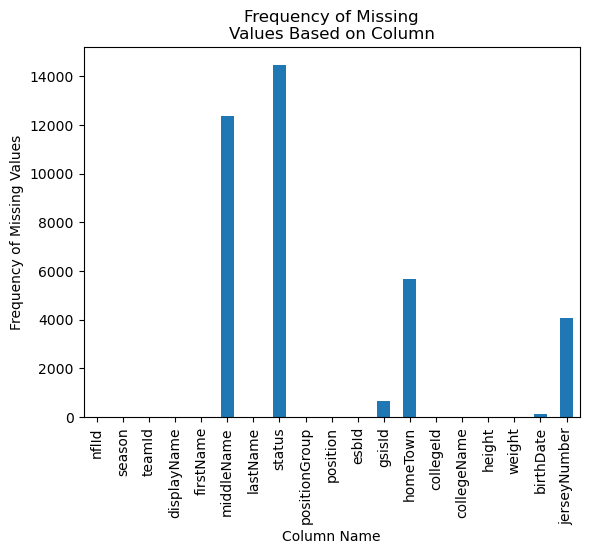

In [8]:
#The number of NaN variable for each columns
player_df.isna().sum().plot(kind = "bar",
                            rot = 90)
plt.xlabel("Column Name")
plt.ylabel("Frequency of Missing Values")
plt.title("Frequency of Missing\nValues Based on Column")
plt.show()

In [9]:
# Number of players missing jerseys and those grouped by status

null_jersey = pd.isnull(player_df['jerseyNumber'])

null_active_players = player_df[null_jersey]
null_active_players["status"].value_counts() 
# Among missing jersey numbers, 23 are developing, 3 are in reserves, and 1 has been cut.
# Recommendation is to drop fields with missing jersey numbers.

DEV    2852
CUT     935
RES     109
RSN      58
ACT      32
NWT      31
EXE       4
SUS       4
PUP       1
Name: status, dtype: int64

In [10]:
# Now we could found there have some missing value in our dataframe we drop it, and clean a bit further.
player_df=player_df.drop(['homeTown'], axis = 1) # Drop both middleName and homeTown columns

In [11]:
# Lets drop missing jerseys among observations

player_df = player_df.dropna(subset = ["jerseyNumber"])

In [12]:
# Verify new count
print(player_df.count())

# We can see there are a few values that remain missing

nflId            52103
season           52103
teamId           52103
displayName      52103
firstName        52103
middleName       41679
lastName         52103
status           37684
positionGroup    52103
position         52103
esbId            52103
gsisId           51637
collegeId        52103
collegeName      52103
height           52097
weight           52097
birthDate        52037
jerseyNumber     52103
dtype: int64


In [13]:
# We will only want to verify players in which there is currently an active status

player_df = player_df[player_df['status']=='ACT']

print(player_df.count())

nflId            23900
season           23900
teamId           23900
displayName      23900
firstName        23900
middleName       20722
lastName         23900
status           23900
positionGroup    23900
position         23900
esbId            23900
gsisId           23844
collegeId        23900
collegeName      23900
height           23900
weight           23900
birthDate        23900
jerseyNumber     23900
dtype: int64


In [14]:
# Let's drop duplicates

player_df = player_df.drop_duplicates()
player_df = player_df.dropna()
print(player_df.count())

nflId            20713
season           20713
teamId           20713
displayName      20713
firstName        20713
middleName       20713
lastName         20713
status           20713
positionGroup    20713
position         20713
esbId            20713
gsisId           20713
collegeId        20713
collegeName      20713
height           20713
weight           20713
birthDate        20713
jerseyNumber     20713
dtype: int64


In [15]:
# We would like to measure the amount of players that participated the most in the NFL over the years based on the dataset.
# We will create a new variable which outlines the amount of occurences among groups.

player_df['Player_Name'] = player_df['firstName'].astype(str) + ' ' + player_df['middleName'] + ' ' + player_df['lastName']
player_df=player_df.drop(['firstName', 'middleName','lastName','displayName'], axis=1)
display(player_df.head())
print(player_df.count())

,nflId,season,teamId,status,positionGroup,position,esbId,gsisId,collegeId,collegeName,height,weight,birthDate,jerseyNumber,Player_Name
0,182,2008,2120,ACT,LB,OLB,ADI219645,00-0026258,5859,Virginia Tech,6-2,232.0,1984-10-18,52.0,Xavier Oyekola Adibi
1,182,2009,2120,ACT,LB,LB,ADI219645,00-0026258,5859,Virginia Tech,6-2,242.0,1984-10-18,52.0,Xavier Oyekola Adibi
2,182,2010,2120,ACT,LB,OLB,ADI219645,00-0026258,5859,Virginia Tech,6-2,242.0,1984-10-18,52.0,Xavier Oyekola Adibi
3,182,2011,3000,ACT,LB,LB,ADI219645,00-0026258,5859,Virginia Tech,6-2,242.0,1984-10-18,57.0,Xavier Oyekola Adibi
4,182,2012,2100,ACT,LB,LB,ADI219645,00-0026258,5859,Virginia Tech,6-2,242.0,1984-10-18,58.0,Xavier Oyekola Adibi


nflId            20713
season           20713
teamId           20713
status           20713
positionGroup    20713
position         20713
esbId            20713
gsisId           20713
collegeId        20713
collegeName      20713
height           20713
weight           20713
birthDate        20713
jerseyNumber     20713
Player_Name      20713
dtype: int64


In [16]:
# After drop na change variable datatype to prepare analysis
conversions = [30.48, 2.54]
player_df['height'] = player_df['height'].str.split('-').apply(pd.Series).astype(int).dot(conversions)

display(player_df.head())

,nflId,season,teamId,status,positionGroup,position,esbId,gsisId,collegeId,collegeName,height,weight,birthDate,jerseyNumber,Player_Name
0,182,2008,2120,ACT,LB,OLB,ADI219645,00-0026258,5859,Virginia Tech,187.96,232.0,1984-10-18,52.0,Xavier Oyekola Adibi
1,182,2009,2120,ACT,LB,LB,ADI219645,00-0026258,5859,Virginia Tech,187.96,242.0,1984-10-18,52.0,Xavier Oyekola Adibi
2,182,2010,2120,ACT,LB,OLB,ADI219645,00-0026258,5859,Virginia Tech,187.96,242.0,1984-10-18,52.0,Xavier Oyekola Adibi
3,182,2011,3000,ACT,LB,LB,ADI219645,00-0026258,5859,Virginia Tech,187.96,242.0,1984-10-18,57.0,Xavier Oyekola Adibi
4,182,2012,2100,ACT,LB,LB,ADI219645,00-0026258,5859,Virginia Tech,187.96,242.0,1984-10-18,58.0,Xavier Oyekola Adibi


In [17]:
# We can now see that player dataset is uniform with exact matches in all columns, contains active players, and creates a Player_Name column that details the full name of the player which will be helpful merging data later.

# Teams Dataset Analysis #

In [18]:
# Import teams dataset

teams = pd.read_csv("team.csv", sep = ",")

# Create dataframe

teams_df = pd.DataFrame(teams)

teams_df.head()

,season,teamId,abbr,cityState,fullName,nick,conferenceAbbr,divisionAbbr
0,1999,200,ATL,Atlanta,Atlanta Falcons,Falcons,NFC,NCW
1,1999,325,BAL,Baltimore,Baltimore Ravens,Ravens,AFC,ACC
2,1999,610,BUF,Buffalo,Buffalo Bills,Bills,AFC,ACE
3,1999,750,CAR,Carolina,Carolina Panthers,Panthers,NFC,NCW
4,1999,810,CHI,Chicago,Chicago Bears,Bears,NFC,NCC


In [19]:
# get basic information
# we have 669 rows and 8 column in teams table
# display data type of variables
display(teams_df.dtypes)
# display dataset shape
display(teams_df.shape)

season             int64
teamId             int64
abbr              object
cityState         object
fullName          object
nick              object
conferenceAbbr    object
divisionAbbr      object
dtype: object

(669, 8)

In [20]:
# display counts

print(teams_df.count())

season            669
teamId            669
abbr              669
cityState         669
fullName          669
nick              669
conferenceAbbr    669
divisionAbbr      669
dtype: int64


In [21]:
# display summary of the table 
display(teams_df.info())
# display summary statistics of the table
display(teams_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   season          669 non-null    int64 
 1   teamId          669 non-null    int64 
 2   abbr            669 non-null    object
 3   cityState       669 non-null    object
 4   fullName        669 non-null    object
 5   nick            669 non-null    object
 6   conferenceAbbr  669 non-null    object
 7   divisionAbbr    669 non-null    object
dtypes: int64(2), object(6)
memory usage: 41.9+ KB


None

,season,teamId
count,669.000000,669.000000
mean,2009.040359,2519.439462
std,6.042998,1392.469543
min,1999.000000,200.000000
25%,2004.000000,1200.000000
50%,2009.000000,2510.000000
75%,2014.000000,3700.000000
max,2019.000000,5110.000000


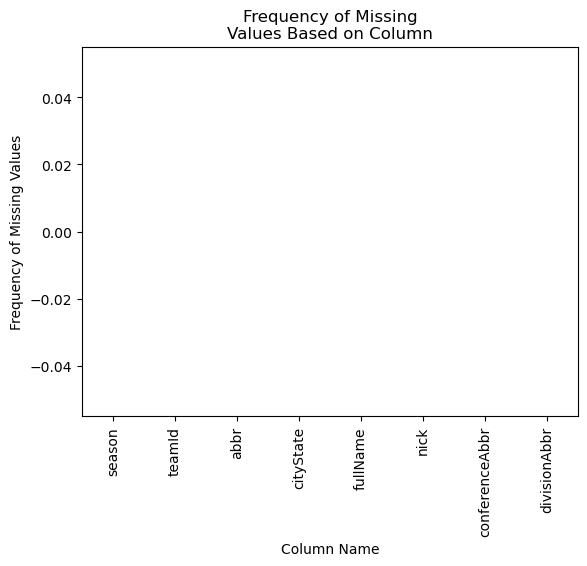

In [22]:
#The number of NaN variable for each columns
teams_df.isna().sum().plot(kind = "bar",
                            rot = 90)
plt.xlabel("Column Name")
plt.ylabel("Frequency of Missing Values")
plt.title("Frequency of Missing\nValues Based on Column")
plt.show()

In [23]:
# Duplicate rows: check if there is drop we do not have duplicate rows
# we can see there is no duplicate rows in our data
display(teams_df.duplicated().sum())
teams_df= teams_df.drop_duplicates()
display(teams_df.head())

0

,season,teamId,abbr,cityState,fullName,nick,conferenceAbbr,divisionAbbr
0,1999,200,ATL,Atlanta,Atlanta Falcons,Falcons,NFC,NCW
1,1999,325,BAL,Baltimore,Baltimore Ravens,Ravens,AFC,ACC
2,1999,610,BUF,Buffalo,Buffalo Bills,Bills,AFC,ACE
3,1999,750,CAR,Carolina,Carolina Panthers,Panthers,NFC,NCW
4,1999,810,CHI,Chicago,Chicago Bears,Bears,NFC,NCC


In [24]:
# Fill NA values with 0
teams_df = teams_df.fillna(0)

teams_df.count()

# Display

print(teams_df.head(25))

    season  teamId abbr        cityState              fullName       nick  \
0     1999     200  ATL          Atlanta       Atlanta Falcons    Falcons   
1     1999     325  BAL        Baltimore      Baltimore Ravens     Ravens   
2     1999     610  BUF          Buffalo         Buffalo Bills      Bills   
3     1999     750  CAR         Carolina     Carolina Panthers   Panthers   
4     1999     810  CHI          Chicago         Chicago Bears      Bears   
5     1999     920  CIN       Cincinnati    Cincinnati Bengals    Bengals   
6     1999    1050  CLE        Cleveland      Cleveland Browns     Browns   
7     1999    1200  DAL           Dallas        Dallas Cowboys    Cowboys   
8     1999    1400  DEN           Denver        Denver Broncos    Broncos   
9     1999    1540  DET          Detroit         Detroit Lions      Lions   
10    1999    1800   GB        Green Bay     Green Bay Packers    Packers   
11    1999    2100  TEN        Tennessee      Tennessee Titans     Titans   

In [25]:
# Drop duplicate columns which have duplicate value with other columns
teams_df=teams_df.drop(['cityState', 'nick'], axis=1)
teams_df=teams_df.rename(columns={"fullName": "cityState_Name"})
teams_df.columns

Index(['season', 'teamId', 'abbr', 'cityState_Name', 'conferenceAbbr',
       'divisionAbbr'],
      dtype='object')

# Plays Dataset #

In [26]:
# Import plays dataset

plays = pd.read_csv("play_new.csv", sep = ",")

# Create dataframe

plays_df = pd.DataFrame(plays)

/var/folders/d2/7qfjnw8103s4p7nj80byvps80000gn/T/ipykernel_31015/955204086.py:3: DtypeWarning: Columns (33,34,37,38,39,41,42,161,162,163,164,165,166,167,168,169,170,173,174,175,176,177,178,179,180,183,184,185,186,189,190,191,192,193,194,195,196,197,198,199,200,204,205,206,219,220,221,222,223,224,225,226,227,228,232,233,234,239,241,242,294,295,296,299,302,303,304) have mixed types. Specify dtype option on import or set low_memory=False.
  plays = pd.read_csv("play_new.csv", sep = ",")


In [27]:
# Basic information for play_new table
# we get 943096 rows and 306 columns
# display data type of variables
display(plays_df.dtypes)
# display dataset shape
display(plays_df.shape)
# display summary of the table 
display(plays_df.info())
# display summary statistics of the table
display(plays_df.describe())

play_id          int64
game_id          int64
home_team       object
away_team       object
posteam         object
                ...   
play             int64
passer_id       object
rusher_id       object
receiver_id     object
qb_epa         float64
Length: 306, dtype: object

(943096, 306)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943096 entries, 0 to 943095
Columns: 306 entries, play_id to qb_epa
dtypes: float64(139), int64(33), object(134)
memory usage: 2.2+ GB


None

,play_id,game_id,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,...,yards,end_yardline_number,series,series_success,success,pass,rush,first_down,play,qb_epa
count,943096.000000,9.430960e+05,906403.000000,942470.000000,942470.000000,942470.000000,943096.000000,943096.000000,943096.000000,943096.000000,...,873110.000000,805337.000000,792459.000000,785111.000000,900033.000000,943096.000000,943096.000000,908498.000000,943096.000000,900033.000000
mean,2090.519291,2.009735e+09,49.144531,412.300738,809.795407,1704.564259,0.022810,12.318476,0.071859,2.571011,...,9.382689,29.178245,28.626277,0.551533,0.421606,0.441467,0.295084,0.222778,0.755942,-0.000118
std,1210.352854,5.757596e+06,24.918277,280.299197,554.683433,1051.622918,0.149297,7.141865,0.258255,1.128282,...,15.305612,12.957741,16.732814,0.497338,0.493816,0.496562,0.456081,0.416110,0.429527,1.328904
min,34.000000,2.000090e+09,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,-109.000000,-126.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.494720
25%,1050.000000,2.005092e+09,30.000000,149.000000,285.000000,797.000000,0.000000,6.000000,0.000000,2.000000,...,0.000000,20.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.619430
50%,2072.000000,2.010093e+09,51.000000,394.000000,800.000000,1800.000000,0.000000,12.000000,0.000000,3.000000,...,4.000000,30.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.070113
75%,3099.000000,2.015091e+09,70.000000,656.000000,1285.000000,2588.000000,0.000000,18.000000,0.000000,4.000000,...,12.000000,40.000000,43.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.583591
max,5921.000000,2.020020e+09,99.000000,900.000000,1800.000000,3600.000000,1.000000,38.000000,1.000000,6.000000,...,185.000000,50.000000,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.904811


In [28]:
# Count number of coluumns missing variables.

count_plays = plays_df.count()

print("Total number of columns among dataset with full value of observations:", sum(count_plays==943096)) # 59 columns contain full amount of rows

print("Total number of columns missing observation values among dataset:",sum(count_plays != 943096)) #247 columns contain missing values!

print("Total number of missing values among all columns with a value of 999 values contained:", sum(count_plays >= 943000)) # 62 columns however contain greater than 943000

Total number of columns among dataset with full value of observations: 59
Total number of columns missing observation values among dataset: 247
Total number of missing values among all columns with a value of 999 values contained: 62


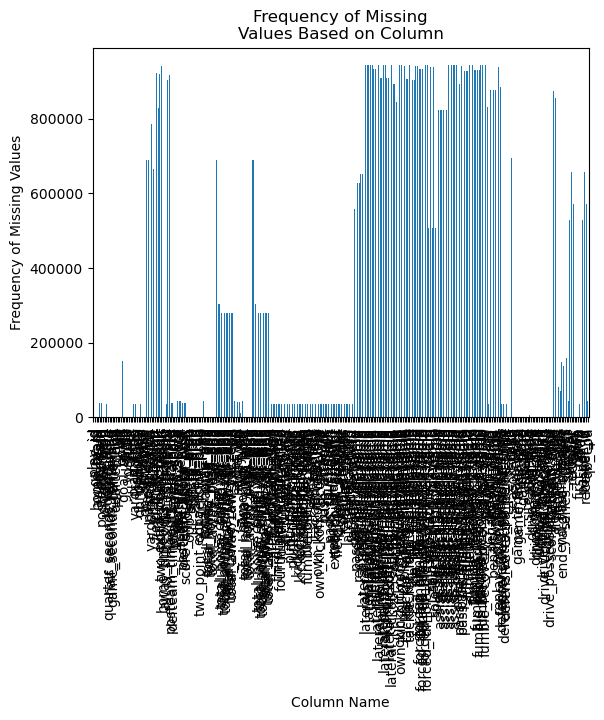

In [29]:
#The number of NaN variable for each columns
plays_df.isna().sum().plot(kind = "bar",
                            rot = 90)
plt.xlabel("Column Name")
plt.ylabel("Frequency of Missing Values")
plt.title("Frequency of Missing\nValues Based on Column")
plt.show()

# High number of missing values, 238 columns to  be specific

In [30]:
# Play-By-Play dataset contains various player id's based on the play that occured. Player_ID based on the column will be ammortized together into a single column:
# Seperate player ID among each column and create unique column for player_id
plays_test = plays_df[['passer_player_id','receiver_player_id','rusher_player_id',
                                                'lateral_sack_player_id',
                                                'interception_player_id',
                                                'punt_returner_player_id',
                                                'punter_player_id',
                                                'kicker_player_id',
                                                'blocked_player_id',
                                                'qb_hit_1_player_id',
                                                'qb_hit_2_player_id',
                                                'solo_tackle_1_player_id',
                                                'solo_tackle_2_player_id',
                                                'fumbled_1_player_id',
                                                'fumbled_2_player_id',
                                                 'penalty_player_id']]

# Create new column with unique player_id
plays_test['player_id'] = plays_test.bfill(axis=1).iloc[:, 0]
plays_test = plays_test['player_id']
# Merge player_id column to original dataset

plays_df.insert(306, "Player_ID", plays_test)

# Drop columns previously used

plays_df = plays_df.drop(columns = ['passer_player_id','receiver_player_id','rusher_player_id',
                                                'lateral_sack_player_id',
                                                'interception_player_id',
                                                'punt_returner_player_id',
                                                'punter_player_id',
                                                'kicker_player_id',
                                                'blocked_player_id',
                                                'qb_hit_1_player_id',
                                                'qb_hit_2_player_id',
                                                'solo_tackle_1_player_id',
                                                'solo_tackle_2_player_id',
                                                'fumbled_1_player_id',
                                                'fumbled_2_player_id',
                                                'penalty_player_id'])

/var/folders/d2/7qfjnw8103s4p7nj80byvps80000gn/T/ipykernel_31015/3389225819.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plays_test['player_id'] = plays_test.bfill(axis=1).iloc[:, 0]


In [31]:
print(plays_df['Player_ID'])

0         00-0019669
1         00-0015784
2         00-0003762
3         00-0006181
4         00-0009212
             ...    
943091    00-0026498
943092    00-0026498
943093           NaN
943094    00-0026498
943095           NaN
Name: Player_ID, Length: 943096, dtype: object


In [32]:
# Duplicate rows: check if there is drop we do not have duplicate rows
# we can see there is no duplicate rows in our data
display(plays_df.duplicated().sum())
plays_df= plays_df.drop_duplicates()

display(plays_df.head(-5))

0

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,pass,rush,name,first_down,play,passer_id,rusher_id,receiver_id,qb_epa,Player_ID
0,34,2000090300,NYG,ARI,NYG,home,ARI,NYG,70.0,2000-09-03,...,0,0,NaN,0.0,1,NaN,NaN,NaN,0.000000,00-0019669
1,34,2000090301,PIT,BAL,PIT,home,BAL,BAL,30.0,2000-09-03,...,0,0,NaN,0.0,0,NaN,NaN,NaN,1.683317,00-0015784
2,34,2000090302,WAS,CAR,WAS,home,CAR,CAR,30.0,2000-09-03,...,0,0,NaN,0.0,0,NaN,NaN,NaN,0.099072,00-0003762
3,34,2000090304,NO,DET,DET,away,NO,NO,30.0,2000-09-03,...,0,0,NaN,0.0,0,NaN,NaN,NaN,0.876797,00-0006181
4,34,2000090305,KC,IND,KC,home,IND,IND,30.0,2000-09-03,...,0,0,NaN,0.0,0,NaN,NaN,NaN,0.000000,00-0009212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943086,5729,2019090809,ARI,DET,ARI,home,DET,DET,46.0,2019-09-08,...,0,0,NaN,0.0,0,NaN,NaN,NaN,-1.010451,00-0022824
943087,5748,2019090809,ARI,DET,DET,away,ARI,DET,95.0,2019-09-08,...,1,0,M.Stafford,0.0,1,00-0026498,NaN,00-0035229,0.106888,00-0026498
943088,5772,2019090809,ARI,DET,DET,away,ARI,DET,88.0,2019-09-08,...,1,0,M.Stafford,1.0,1,00-0026498,NaN,00-0026035,0.383586,00-0026498
943089,5796,2019090809,ARI,DET,DET,away,ARI,DET,88.0,2019-09-08,...,0,0,NaN,0.0,0,NaN,NaN,NaN,0.000000,NaN


In [33]:
#Base on our bussiness problem we choose these columns to be our new plays data frame
plays_df=plays_df[['Player_ID','game_id','first_down','drive_how_ended','home_team','away_team','yardline_100','yards_gained','play_type','series','yards','success','total_home_score','total_away_score','drive_play_count','return_yards','ydstogo','game_date']].copy()
display(plays_df)

,Player_ID,game_id,first_down,drive_how_ended,home_team,away_team,yardline_100,yards_gained,play_type,series,yards,success,total_home_score,total_away_score,drive_play_count,return_yards,ydstogo,game_date
0,00-0019669,2000090300,0.0,Punt,NYG,ARI,70.0,0.0,no_play,NaN,5.0,0.0,0,0,3,0.0,0,2000-09-03
1,00-0015784,2000090301,0.0,Punt,PIT,BAL,30.0,0.0,kickoff,NaN,35.0,1.0,0,0,3,25.0,0,2000-09-03
2,00-0003762,2000090302,0.0,Touchdown,WAS,CAR,30.0,0.0,kickoff,NaN,49.0,1.0,0,0,12,17.0,0,2000-09-03
3,00-0006181,2000090304,0.0,Punt,NO,DET,30.0,0.0,kickoff,NaN,41.0,1.0,0,0,6,18.0,0,2000-09-03
4,00-0009212,2000090305,0.0,Punt,KC,IND,30.0,0.0,kickoff,NaN,50.0,0.0,0,0,3,0.0,0,2000-09-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943091,00-0026498,2019090809,0.0,Downs,ARI,DET,85.0,0.0,qb_spike,70.0,0.0,0.0,27,27,6,0.0,19,2019-09-08
943092,00-0026498,2019090809,0.0,Downs,ARI,DET,85.0,0.0,pass,70.0,0.0,0.0,27,27,6,0.0,19,2019-09-08
943093,NaN,2019090809,0.0,Downs,ARI,DET,85.0,0.0,no_play,70.0,-5.0,0.0,27,27,6,0.0,19,2019-09-08
943094,00-0026498,2019090809,0.0,Downs,ARI,DET,90.0,0.0,pass,70.0,0.0,NaN,27,27,6,0.0,24,2019-09-08


In [34]:
# check NAN value in new palys_df
print(plays_df.isna().sum())

Player_ID            73090
game_id                  0
first_down           34598
drive_how_ended          5
home_team                0
away_team                0
yardline_100         36693
yards_gained         34598
play_type            34598
series              150637
yards                69986
success              43063
total_home_score         0
total_away_score         0
drive_play_count         0
return_yards         34598
ydstogo                  0
game_date                0
dtype: int64


In [35]:
# fillna with mean
plays_df['series'].fillna(int(plays_df['series'].mean()), inplace=True)
plays_df['first_down'].fillna(int(plays_df['first_down'].mean()), inplace=True)
plays_df['yardline_100'].fillna(int(plays_df['yardline_100'].mean()), inplace=True)
plays_df['yards_gained'].fillna(int(plays_df['yards_gained'].mean()), inplace=True)
plays_df['yards'].fillna(int(plays_df['yards'].mean()), inplace=True)
plays_df['return_yards'].fillna(int(plays_df['return_yards'].mean()), inplace=True)
#fillna with 0
plays_df['success'].fillna(0,inplace=True)
# drop the other missing value in play_type column
plays_df = plays_df.dropna(subset = ["play_type","Player_ID","drive_how_ended"])
# Create addtiional game year

plays_df['game_year'] = plays_df['game_date'].astype(str).str[0:4]
plays_df['game_year'] = plays_df['game_year'].astype(int)

#Get information for new palys_df
display(plays_df.head())
display(plays_df.shape)


,Player_ID,game_id,first_down,drive_how_ended,home_team,away_team,yardline_100,yards_gained,play_type,series,yards,success,total_home_score,total_away_score,drive_play_count,return_yards,ydstogo,game_date,game_year
0,00-0019669,2000090300,0.0,Punt,NYG,ARI,70.0,0.0,no_play,28.0,5.0,0.0,0,0,3,0.0,0,2000-09-03,2000
1,00-0015784,2000090301,0.0,Punt,PIT,BAL,30.0,0.0,kickoff,28.0,35.0,1.0,0,0,3,25.0,0,2000-09-03,2000
2,00-0003762,2000090302,0.0,Touchdown,WAS,CAR,30.0,0.0,kickoff,28.0,49.0,1.0,0,0,12,17.0,0,2000-09-03,2000
3,00-0006181,2000090304,0.0,Punt,NO,DET,30.0,0.0,kickoff,28.0,41.0,1.0,0,0,6,18.0,0,2000-09-03,2000
4,00-0009212,2000090305,0.0,Punt,KC,IND,30.0,0.0,kickoff,28.0,50.0,0.0,0,0,3,0.0,0,2000-09-03,2000


(870001, 19)

In [36]:
# check we drop all NAN value
print(plays_df.isna().sum())

Player_ID           0
game_id             0
first_down          0
drive_how_ended     0
home_team           0
away_team           0
yardline_100        0
yards_gained        0
play_type           0
series              0
yards               0
success             0
total_home_score    0
total_away_score    0
drive_play_count    0
return_yards        0
ydstogo             0
game_date           0
game_year           0
dtype: int64


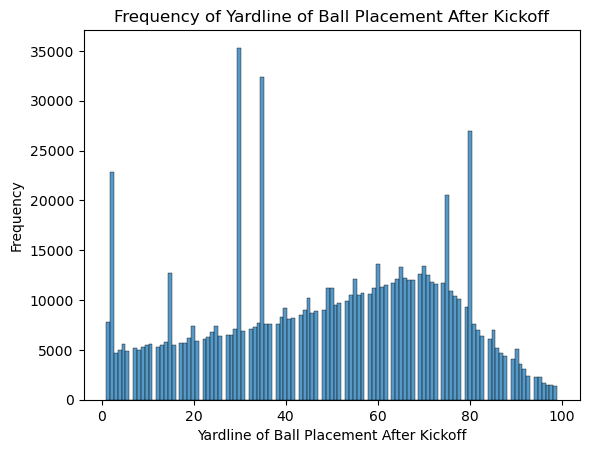

In [37]:
# Common ball placement during games

ball = sns.histplot(plays_df['yardline_100'])
ball.set(xlabel = "Yardline of Ball Placement After Kickoff",
        ylabel = "Frequency",
        title = "Frequency of Yardline of Ball Placement After Kickoff")
plt.show()

# Merge Datasets #

In [38]:
# Let's verify shape of each dataset

print("Shape of plays_df is:", plays_df.shape)
print("Shape of player_df is:", player_df.shape)
print("Shape of teams dataset is:", teams_df.shape)

Shape of plays_df is: (870001, 19)
Shape of player_df is: (20713, 15)
Shape of teams dataset is: (669, 6)


In [39]:
# Merge DataFrames with different column names

merged_data = plays_df.merge(player_df, left_on = ['Player_ID','game_year'], right_on = ['gsisId','season'], how = 'inner')
print(merged_data.head(5))
print(merged_data.shape)

    Player_ID     game_id  first_down drive_how_ended home_team away_team  \
0  00-0023482  2006101508         0.0            Punt       NYJ       MIA   
1  00-0023482  2006091712         0.0            Punt       NYJ        NE   
2  00-0023482  2006111207         0.0            Punt        NE       NYJ   
3  00-0023482  2006092400         0.0       Touchdown       BUF       NYJ   
4  00-0023482  2006121008         0.0            Punt       NYJ       BUF   

   yardline_100  yards_gained play_type  series  ...  position      esbId  \
0          30.0           0.0   kickoff    28.0  ...         K  NUG461506   
1          30.0           0.0   kickoff    28.0  ...         K  NUG461506   
2          30.0           0.0   kickoff    28.0  ...         K  NUG461506   
3          30.0           0.0   kickoff    28.0  ...         K  NUG461506   
4          30.0           0.0   kickoff    28.0  ...         K  NUG461506   

       gsisId  collegeId  collegeName  height  weight   birthDate  \
0  00

In [40]:
# Merge teamID to final dataset
final_df = merged_data.merge(teams_df, left_on = ["teamId",'game_year'] , right_on = ["teamId",'season'], how ='inner')
final_df = final_df.drop_duplicates() 
print(final_df.shape)

(513838, 39)


In [41]:
#The number of NaN variable for each columns
pd.set_option('display.max_rows', None)
print(final_df.isna().sum())

Player_ID           0
game_id             0
first_down          0
drive_how_ended     0
home_team           0
away_team           0
yardline_100        0
yards_gained        0
play_type           0
series              0
yards               0
success             0
total_home_score    0
total_away_score    0
drive_play_count    0
return_yards        0
ydstogo             0
game_date           0
game_year           0
nflId               0
season_x            0
teamId              0
status              0
positionGroup       0
position            0
esbId               0
gsisId              0
collegeId           0
collegeName         0
height              0
weight              0
birthDate           0
jerseyNumber        0
Player_Name         0
season_y            0
abbr                0
cityState_Name      0
conferenceAbbr      0
divisionAbbr        0
dtype: int64


In [42]:
# Export our final data to .csv
# create new dataframe for export data
export_df = pd.DataFrame(final_df)
# export final data to .csv format.
export_df.to_csv(r"NFL_Play_by_Play_Clean.csv", index=False)

# Data Set Analysis

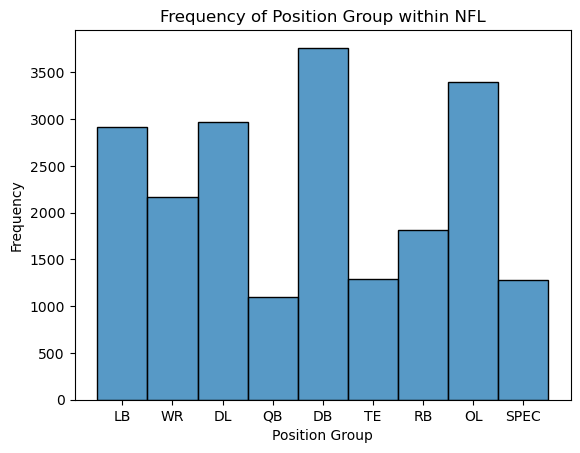

In [43]:
# Analysis of Position Group in NFL

sns.histplot(player_df['positionGroup'])
plt.ylabel('Frequency')
plt.xlabel('Position Group')
plt.title('Frequency of Position Group within NFL')
plt.show()

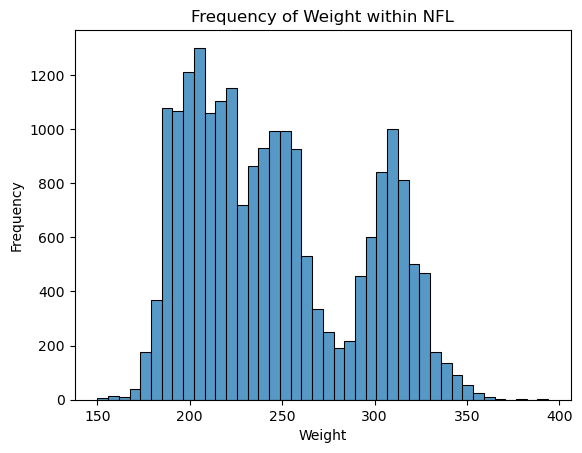

In [44]:
# Analysis of Weight in NFL

my_plot= sns.histplot(player_df['weight'])
plt.ylabel('Frequency')
plt.xlabel('Weight')
plt.title('Frequency of Weight within NFL')
plt.show()

/Users/xiaoliang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


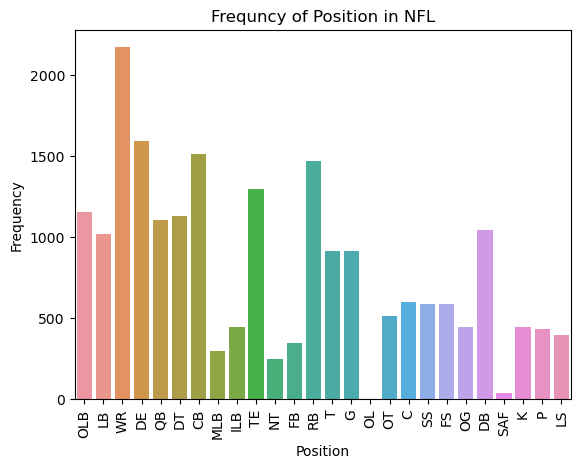

In [45]:
# Popular Position 
my_plot = sns.countplot(player_df['position'])
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
plt.ylabel('Frequency')
plt.xlabel('Position')
plt.title('Frequncy of Position in NFL')
plt.show()

In [46]:
# Create pivot to verify longest tenured players in NFL over the years pertianing to player dataset
plays_df_pivot = pd.pivot_table(plays_df[plays_df.success==0],
                              values = ['success'],
                              index = 'drive_how_ended',
                             aggfunc='count',
                             fill_value=0)

sorted_plays_df_pivot = plays_df_pivot.sort_values(by=['success'], ascending = False)

display(sorted_plays_df_pivot.head(25))

sorted_college_pivot_df = pd.DataFrame(sorted_plays_df_pivot.head(25).reset_index())

,success
drive_how_ended,
Punt,208804
Field_Goal,82777
Touchdown,81060
Interception,32689
Downs,25305
Missed_FG,18772
Fumble,18629
End_of_Game,12363
End_of_Half,7749


In [47]:
# Create pivot to verify longest tenured players in NFL over the years pertianing to player dataset
player_pivot = pd.pivot_table(player_df,
                              values = ['season'],
                              index = ['Player_Name', 'position'],
                             aggfunc='count',
                             fill_value = 0)

sorted_player_pivot = player_pivot.sort_values(by=['season'], ascending = False)

display(sorted_player_pivot.head(10))

sorted_player_df = pd.DataFrame(sorted_player_pivot.head(25).reset_index())

,,season
Player_Name,position,
Drew Christopher Brees,QB,14
Larry Darnell Fitzgerald,WR,14
Sam David Koch,P,14
Eli Nelson Manning,QB,14
Philip S. Rivers,QB,14
Dustin Farr Colquitt,P,14
Don Lynn Muhlbach,LS,14
Adam Mathew Vinatieri,K,13
Marcedes Alexis Lewis,TE,13


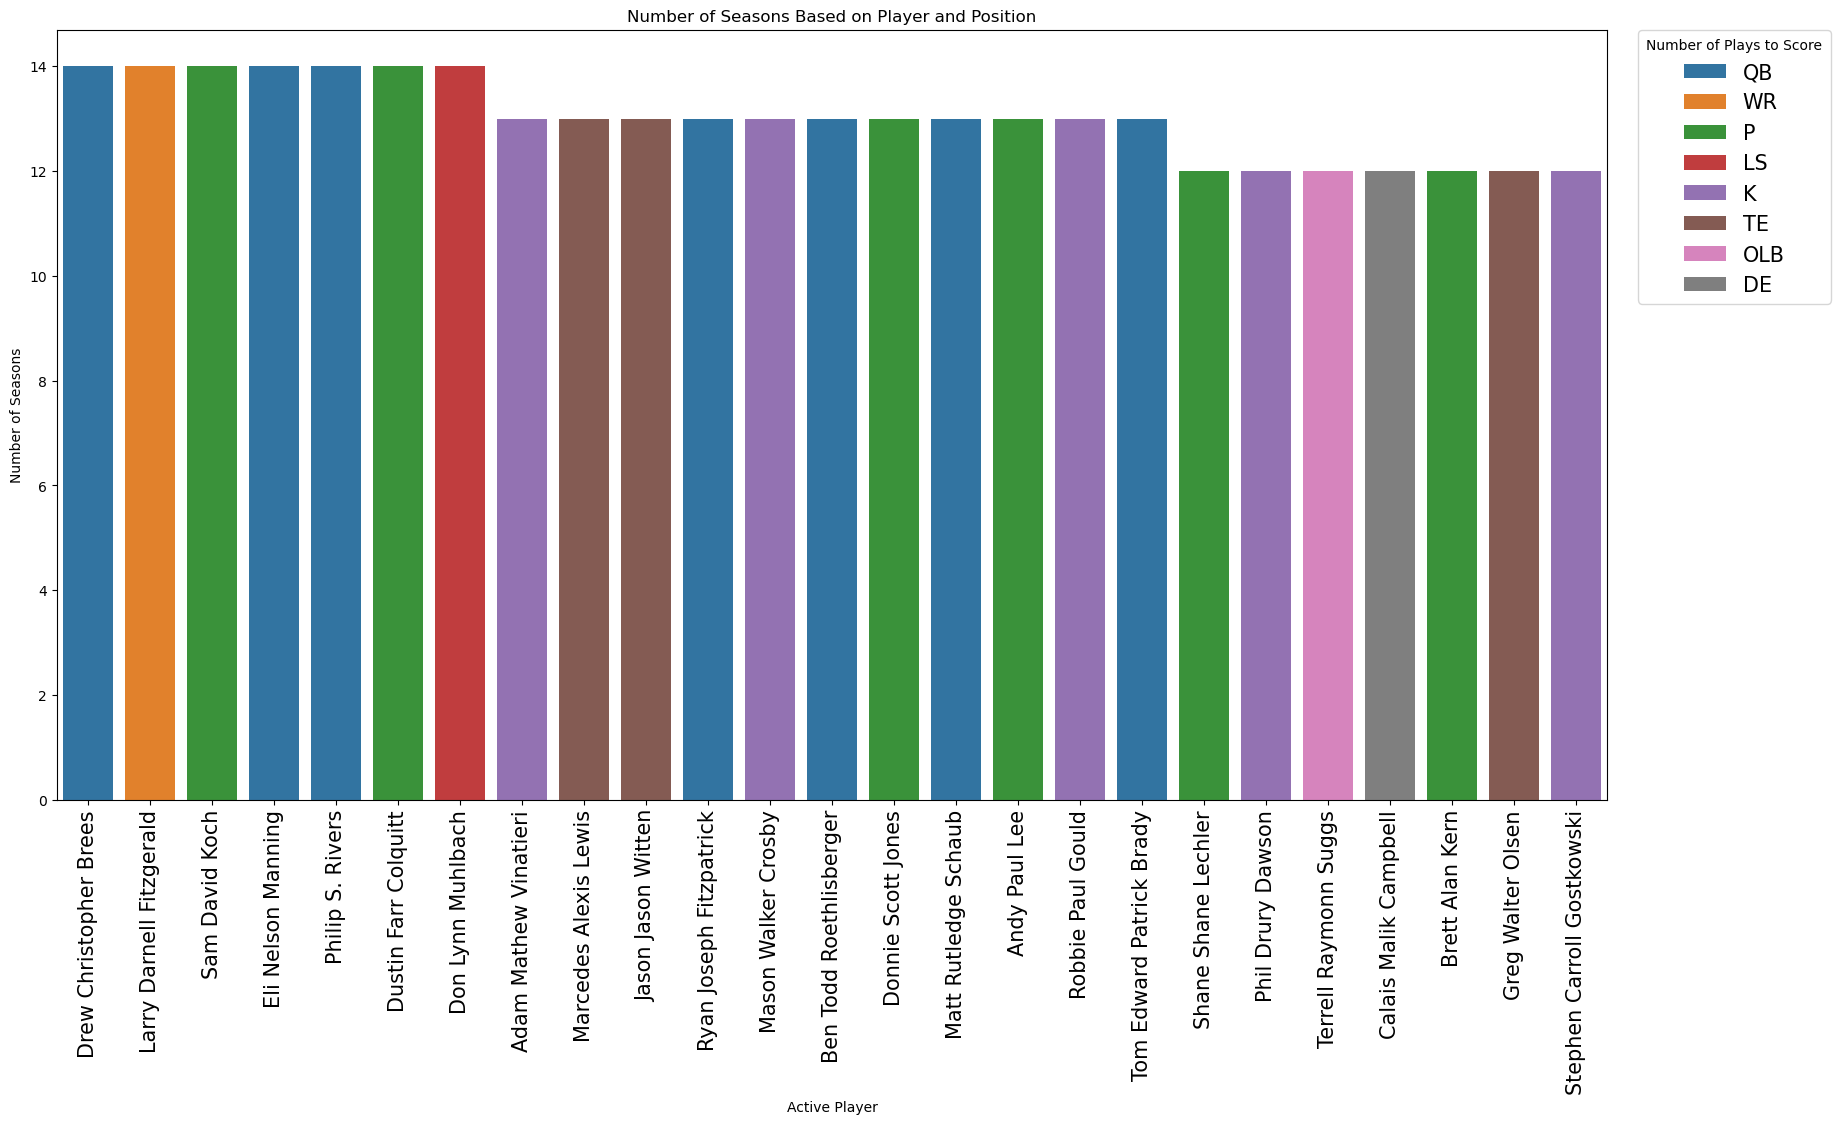

In [48]:
# Lets plot the figure
plt.figure(figsize=(20,10))
sns.barplot(data = sorted_player_df, 
                x = 'Player_Name', 
                y='season',
               hue = 'position',
           dodge = False).tick_params(axis='x', rotation=90)
plt.xlabel('Active Player')
plt.ylabel('Number of Seasons')
plt.title('Number of Seasons Based on Player and Position')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Number of Plays to Score', fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [49]:
# Verify average weight of tenured players:

tenured_players = sorted_player_pivot.head(50)

tenured_players_merged = pd.DataFrame(tenured_players.merge(player_df, left_on = 'Player_Name', right_on = 'Player_Name', how = 'inner'))

desired_traits = tenured_players_merged[['Player_Name','weight']]

desired_traits2 = desired_traits[['weight']].mean()

desired_traits2

weight    226.14378
dtype: float64

In [50]:
# Create pivot to most amount of colleges selected by NFL based on frequency
college_pivot = pd.pivot_table(player_df,
                              values = 'season',
                              index = 'collegeName',
                             aggfunc='count',
                             fill_value=0)

sorted_college_pivot = college_pivot.sort_values(by=['season'], ascending = False)

display(sorted_college_pivot.head(25))

sorted_college_pivot_df = pd.DataFrame(sorted_college_pivot.head(25).reset_index())

,season
collegeName,
LSU,469
Miami (Fla.),429
USC,397
Ohio State,396
Florida State,373
Tennessee,371
Florida,361
Georgia,359
Texas,356


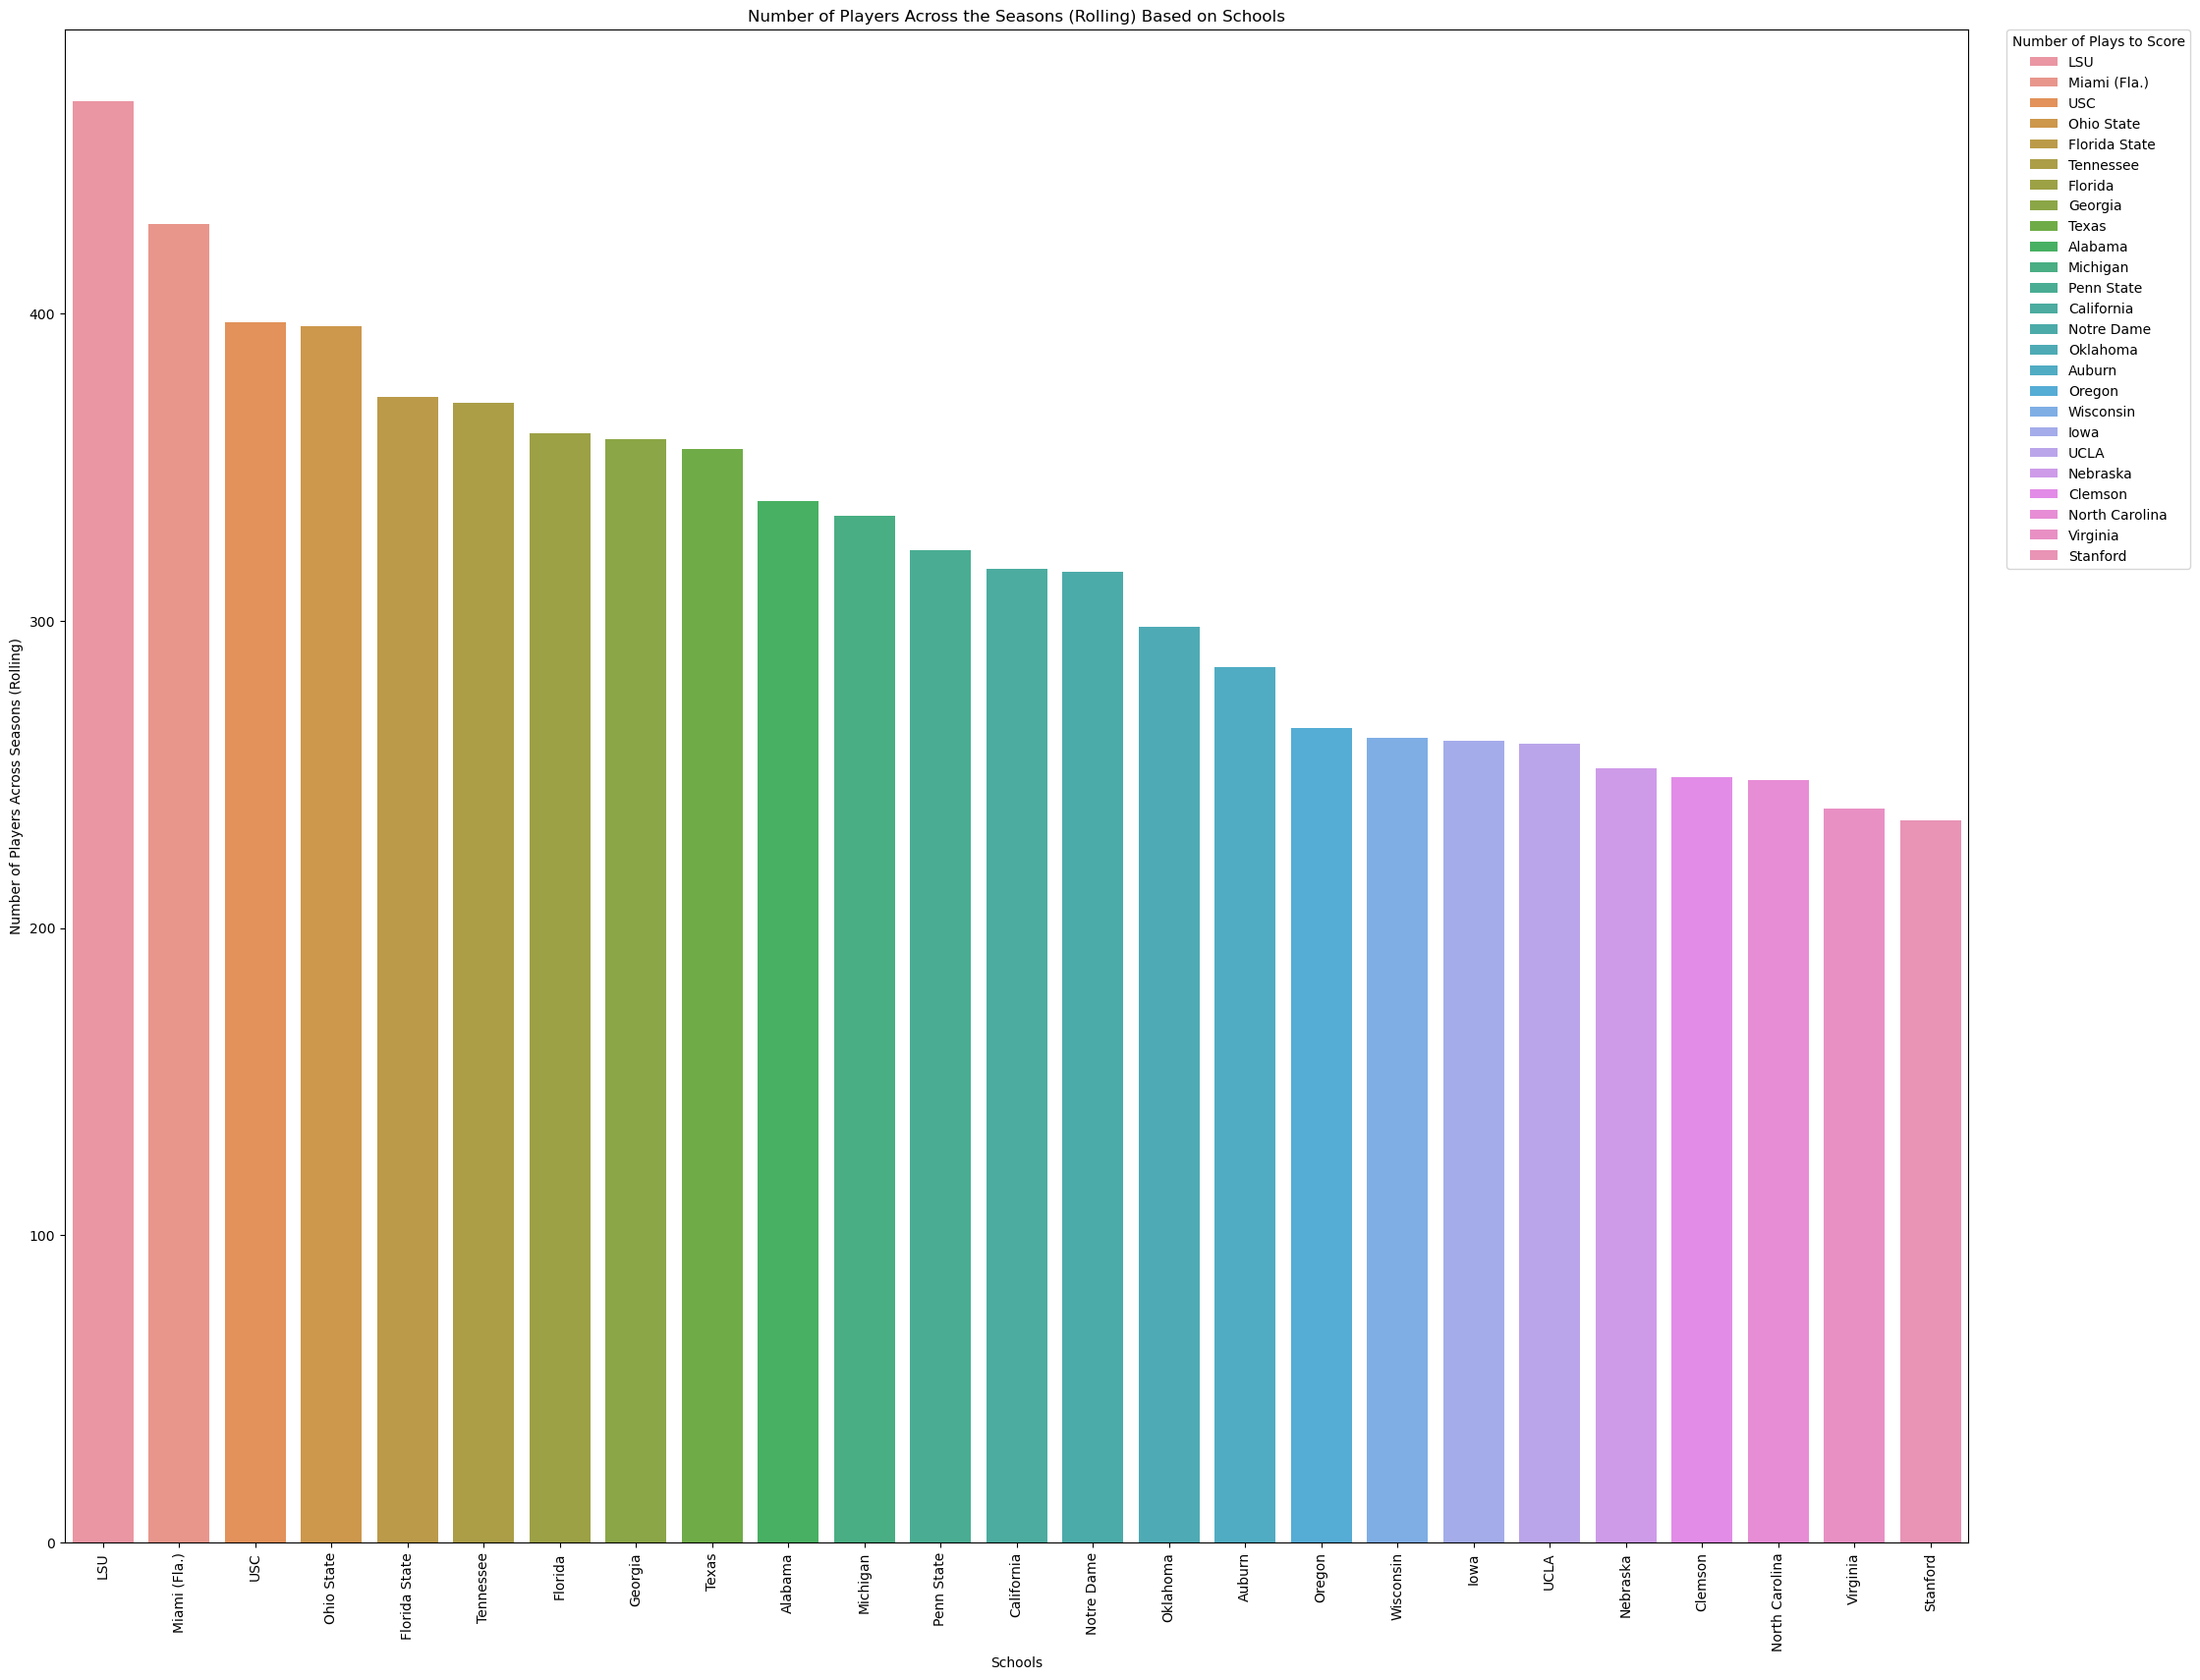

In [51]:
# Lets plot the figure
plt.figure(figsize=(25,20))
sns.barplot(data = sorted_college_pivot_df, 
                x = 'collegeName', 
                y='season',
               hue = 'collegeName',
           dodge = False).tick_params(axis='x', rotation=90)
plt.xlabel('Schools')
plt.ylabel('Number of Players Across Seasons (Rolling)')
plt.title('Number of Players Across the Seasons (Rolling) Based on Schools')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Number of Plays to Score')
plt.xticks()
plt.show()

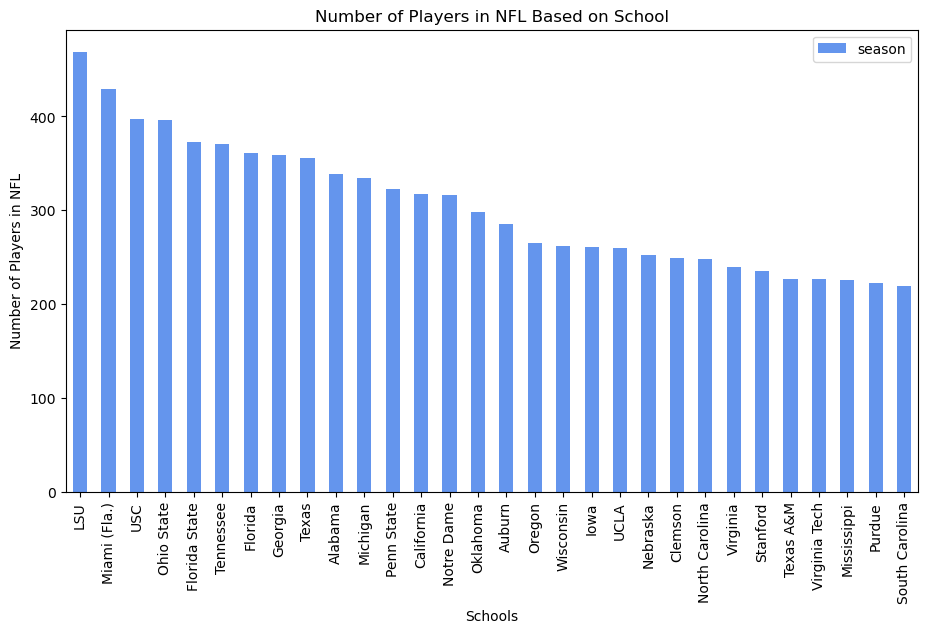

In [52]:
ax = sorted_college_pivot.head(30).plot(kind = 'bar', figsize=(11,6), color = 'cornflowerblue')
plt.ylabel('Number of Players in NFL')
plt.xlabel('Schools')
plt.title('Number of Players in NFL Based on School')
plt.show()

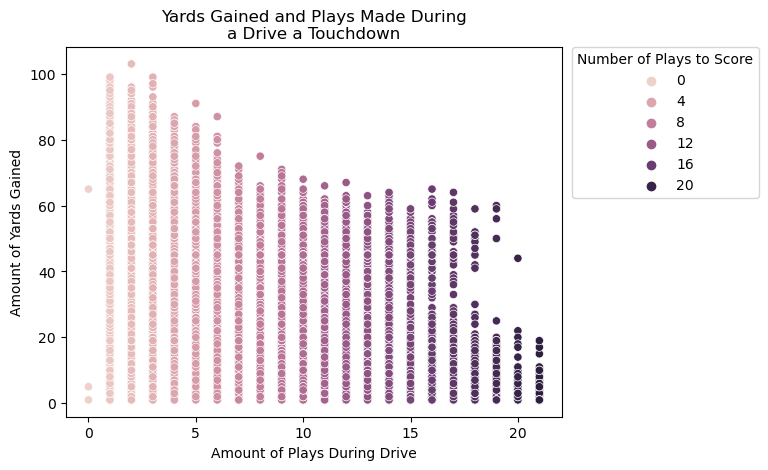

In [53]:
# Create plot among touchdowns that are scored with amount of plays while comparing yards gained.

touchdown_plays = plays_df.loc[(plays_df['drive_how_ended']=='Touchdown')& (plays_df['yards']>0)]
sns.scatterplot(data = touchdown_plays, 
                x = 'drive_play_count', 
                y='yards',
               hue = 'drive_play_count')
plt.xlabel('Amount of Plays During Drive')
plt.ylabel('Amount of Yards Gained')
plt.title('Yards Gained and Plays Made During\na Drive a Touchdown')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Number of Plays to Score')
plt.show()

<AxesSubplot:xlabel='play_type', ylabel='yards'>

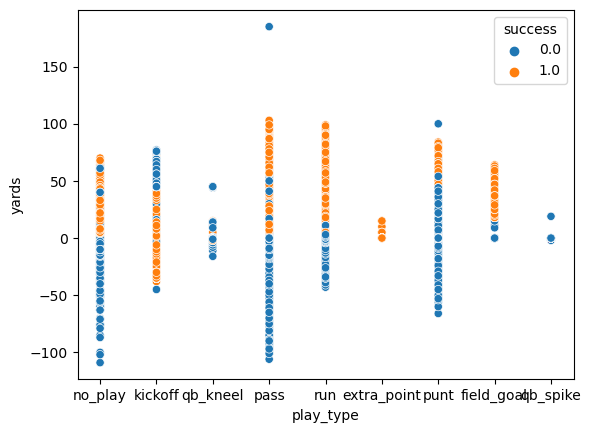

In [54]:
sns.scatterplot(data = plays_df, 
                x = 'play_type', 
                y='yards',
               hue = 'success')

The number of unsuccesful play occurences is:491141
The number of  unsuccesful play occurences is:378860


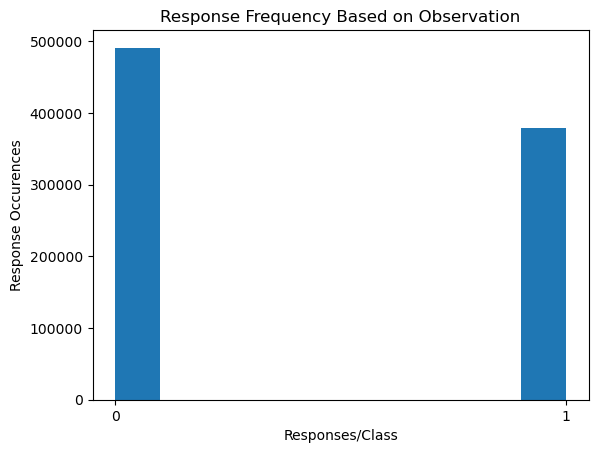

In [55]:
# Class imbalance among dataset

import matplotlib.ticker as ticker

plt.hist(plays_df['success'], label = ['0','1'])
plt.xticks([0,1])
plt.ylabel("Response Occurences")
plt.xlabel("Responses/Class")
plt.title("Response Frequency Based on Observation")
plt.plot()

print("The number of unsuccesful play occurences is:" + str(plays_df[plays_df.success == 0].shape[0]))

print("The number of  unsuccesful play occurences is:"+ str(plays_df[plays_df.success == 1].shape[0]))

# Create Random Sample of Final Dataset for Predictive Analysis

In [56]:
# Random sample of 5k observations

final_sample = final_df.sample(5000, replace = False)
print(final_sample.shape)

(5000, 39)


# Logistic Regression

In [57]:
# Create pivot to verify longest tenured players in NFL over the years pertianing to player dataset
plays_df_pivot = pd.pivot_table(final_sample[final_sample.success==0],
                              values = ['success'],
                              index = 'drive_how_ended',
                             aggfunc='count',
                             fill_value=0)

sorted_plays_df_pivot = plays_df_pivot.sort_values(by=['success'], ascending = False)

display(sorted_plays_df_pivot.head(25))

sorted_college_pivot_df = pd.DataFrame(sorted_college_pivot.head(25).reset_index())

print('\n\n\n', final_sample.columns)

,success
drive_how_ended,
Punt,1091
Field_Goal,474
Touchdown,447
Interception,184
Downs,131
Missed_FG,115
End_of_Game,98
Fumble,86
End_of_Half,40





 Index(['Player_ID', 'game_id', 'first_down', 'drive_how_ended', 'home_team',
       'away_team', 'yardline_100', 'yards_gained', 'play_type', 'series',
       'yards', 'success', 'total_home_score', 'total_away_score',
       'drive_play_count', 'return_yards', 'ydstogo', 'game_date', 'game_year',
       'nflId', 'season_x', 'teamId', 'status', 'positionGroup', 'position',
       'esbId', 'gsisId', 'collegeId', 'collegeName', 'height', 'weight',
       'birthDate', 'jerseyNumber', 'Player_Name', 'season_y', 'abbr',
       'cityState_Name', 'conferenceAbbr', 'divisionAbbr'],
      dtype='object')


In [58]:
# Improt packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Since Football success can be categorized with success of touchdown, field goal, or conversion to a first down, we can utilize prediction analytics to verify the likelihood a positive outcome would occur.

plays_df_logistic = final_sample.drop(['game_date', 'Player_ID', 'drive_how_ended', 'home_team', 'away_team',
                                       'play_type','game_date','status', 'positionGroup', 'position', 'esbId', 'gsisId',
                                       'collegeId', 'collegeName', 'height', 'weight', 'birthDate','jerseyNumber', 
                                       'Player_Name', 'season_y','cityState_Name','abbr', 'conferenceAbbr', 'divisionAbbr'], axis = 1)
# construct datasets for analysis

x = plays_df_logistic.drop('success', axis = 1)
            
y= plays_df_logistic[['success']]

In [59]:
# Create traininng and test data

x_training, x_test, y_training, y_test = train_test_split(x, y, test_size = .4, random_state = 5)

In [60]:
# One important assumption to use sklearn is to make sure the independent variables are standardized
# Scale the feature data so it has mean = 0 and standard deviation = 1

scaler = StandardScaler()
x_training = pd.DataFrame(scaler.fit_transform(x_training), index = x_training.index, columns = x_training.columns)


x_test = pd.DataFrame(scaler.fit_transform(x_test), index = x_test.index, columns = x_test.columns)

In [61]:
# Create and train the model
score_lr=LogisticRegression()

# fit the model

score_lr.fit(x_training, y_training)

/Users/xiaoliang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [62]:
# Score the model on the train data

print(score_lr.score(x_training, y_training))
# Score the model on the test data
print(score_lr.score(x_test, y_test))

0.8303333333333334
0.816


[]

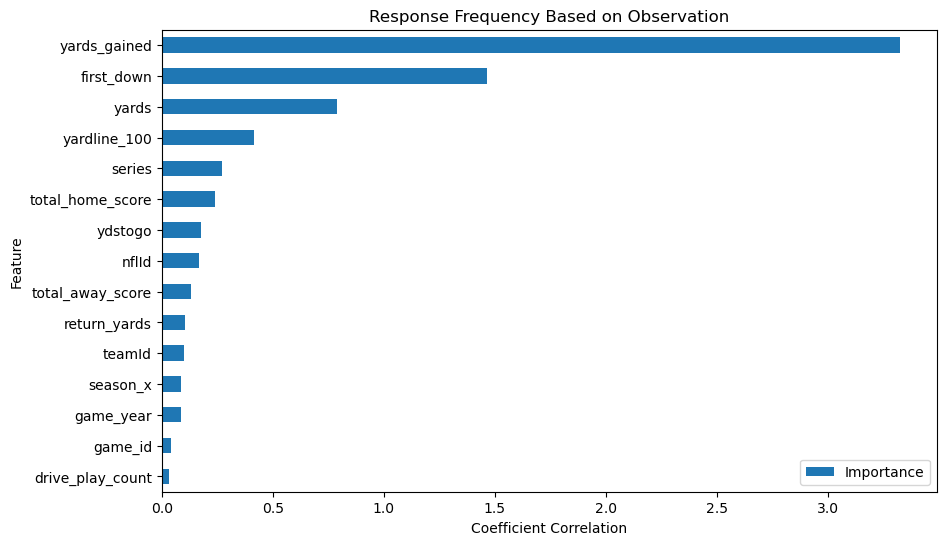

In [63]:
coefficients = score_lr.coef_[0]

feature_importance = pd.DataFrame({'Feature': x_training.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.xlabel("Coefficient Correlation")
plt.title("Response Frequency Based on Observation")
plt.plot()

# Logistic Regression Based With Dummy Variables

In [64]:
# Create dummy variables

drive_ended_dummy = pd.get_dummies(final_sample['drive_how_ended'])

# Create new data frame
drive_ended_dummy = pd.DataFrame(drive_ended_dummy)

# Subset dataframe to dummy variables only
drive_ended_dummy = drive_ended_dummy['Touchdown']
# insert new rows

# Insert touchdown column as dummy variable into dataset
final_sample.insert(39, "Touchdown", drive_ended_dummy)
print(final_sample.head())

         Player_ID     game_id  first_down drive_how_ended home_team  \
298159  00-0033869  2017121002         1.0      Field_Goal       CIN   
128181  00-0024448  2009101807         0.0    Interception       WAS   
133980  00-0025512  2010110707         0.0       Touchdown       CAR   
288575  00-0022924  2016121100         0.0       Touchdown       BUF   
163078  00-0027954  2011111309         1.0      Field_Goal       MIA   

       away_team  yardline_100  yards_gained play_type  series  ...  weight  \
298159       CHI          77.0          10.0      pass    22.0  ...   222.0   
128181        KC          67.0           0.0   no_play    22.0  ...   305.0   
133980        NO          70.0           0.0   no_play    21.0  ...   315.0   
288575       PIT          45.0           5.0      pass    12.0  ...   240.0   
163078       WAS          19.0           0.0   no_play    15.0  ...   267.0   

         birthDate  jerseyNumber              Player_Name  season_y  abbr  \
298159  1994-08

In [65]:
# Drop columns specific to dataset and create touchdown play classifier
final_sample_logistic = final_sample.drop(['game_date', 'Player_ID', 'drive_how_ended', 'home_team', 'away_team','play_type','game_date',
                                           'status', 'positionGroup', 'position', 'esbId', 'gsisId',
                                           'collegeId', 'collegeName', 'height', 'weight', 'birthDate',
                                           'jerseyNumber', 'Player_Name', 'season_y', 'abbr', 'cityState_Name', 'success', 'conferenceAbbr', 'divisionAbbr'], axis = 1)
touchdown_plays = final_sample_logistic[final_sample['play_type'].isin(['pass','run'])]

In [66]:
x = touchdown_plays.drop('Touchdown', axis = 1)
            
y= touchdown_plays[['Touchdown']]

In [67]:
# Create traininng and test data

x_training, x_test, y_training, y_test = train_test_split(x, y, test_size = .4, random_state = 6)

In [68]:
# One important assumption to use sklearn is to make sure the independent variables are standardized
# Scale the feature data so it has mean = 0 and standard deviation = 1

scaler = StandardScaler()
x_training = pd.DataFrame(scaler.fit_transform(x_training), index = x_training.index, columns = x_training.columns)

x_test = pd.DataFrame(scaler.fit_transform(x_test), index = x_test.index, columns = x_test.columns)


In [69]:
# Create and train the model
score_lr=LogisticRegression()

# fit the model

score_lr.fit(x_training, y_training)

/Users/xiaoliang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [70]:
# Score the model on the train data

print(score_lr.score(x_training, y_training))
# Score the model on the test data
print(score_lr.score(x_test, y_test))

0.7540983606557377
0.7661129568106312


[]

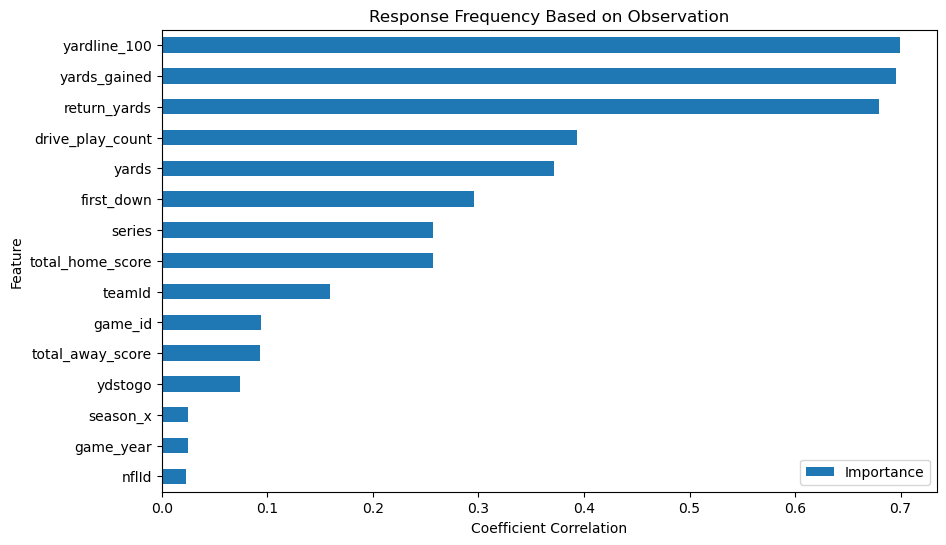

In [71]:
coefficients = score_lr.coef_[0]

feature_importance = pd.DataFrame({'Feature': x_training.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.xlabel("Coefficient Correlation")
plt.title("Response Frequency Based on Observation")
plt.plot()

# Linear Regression

In [72]:
print(final_sample['play_type'].value_counts())

pass           2240
run            1522
kickoff         323
punt            304
no_play         266
extra_point     135
field_goal      131
qb_kneel         71
qb_spike          8
Name: play_type, dtype: int64


In [73]:
# Reduce dataset

touchdown_plays = final_sample[final_sample['drive_how_ended'].isin(['Touchdown']) & final_sample['play_type'].isin(['pass','run'])]
touchdown_plays = pd.DataFrame(touchdown_plays)
print(touchdown_plays.head())

         Player_ID     game_id  first_down drive_how_ended home_team  \
288575  00-0022924  2016121100         0.0       Touchdown       BUF   
459259  00-0034869  2018091000         0.0       Touchdown       DET   
372437  00-0030388  2014122109         0.0       Touchdown       DAL   
287860  00-0026498  2016120407         0.0       Touchdown        NO   
137935  00-0025637  2010110708         1.0       Touchdown       SEA   

       away_team  yardline_100  yards_gained play_type  series  ...  weight  \
288575       PIT          45.0           5.0      pass    12.0  ...   240.0   
459259       NYJ          17.0           3.0      pass     8.0  ...   225.0   
372437       IND          35.0           2.0       run    13.0  ...   210.0   
287860       DET           2.0           0.0      pass    28.0  ...   226.0   
137935       NYG           4.0           4.0       run    13.0  ...   198.0   

         birthDate  jerseyNumber               Player_Name  season_y  abbr  \
288575  1982-0

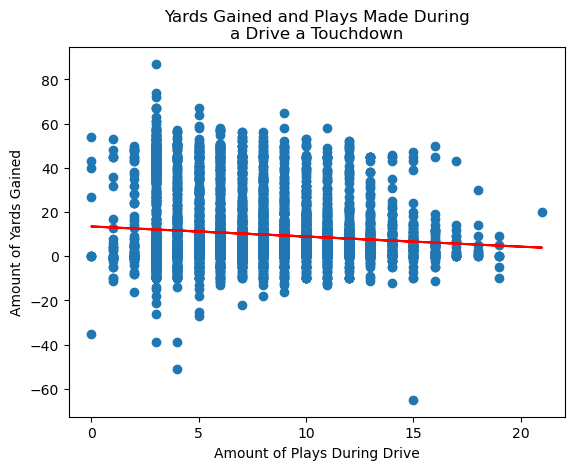

[[-0.45627315]]


In [74]:
# package
from sklearn.linear_model import LinearRegression

# Create Linear Regression
#Create variables

x = final_sample.iloc[:,14].values.reshape(-1,1)

y = final_sample.iloc[:,10].values.reshape(-1,1)

# Create linear regression
linear_regressor_touchdown_plays = LinearRegression()
linear_regressor_touchdown_plays.fit(x,y)

# Predict the set results

y_pred = linear_regressor_touchdown_plays.predict(x)

# Create scatterplot

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Amount of Plays During Drive')
plt.ylabel('Amount of Yards Gained')
plt.title('Yards Gained and Plays Made During\na Drive a Touchdown')
plt.show()

print(linear_regressor_touchdown_plays.coef_)

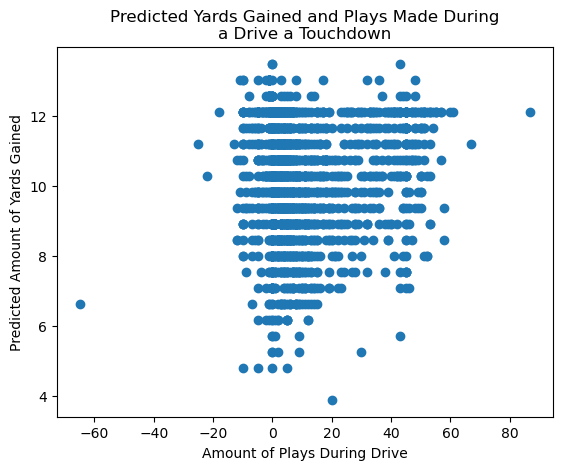

In [75]:
# Train test the model

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size= .4 ,random_state=101)

# Create model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Predict results

prediction = linear_regressor_touchdown_plays.predict(X_test)

plt.scatter(Y_test,prediction)
plt.xlabel('Amount of Plays During Drive')
plt.ylabel('Predicted Amount of Yards Gained')
plt.title('Predicted Yards Gained and Plays Made During\na Drive a Touchdown')
plt.show()

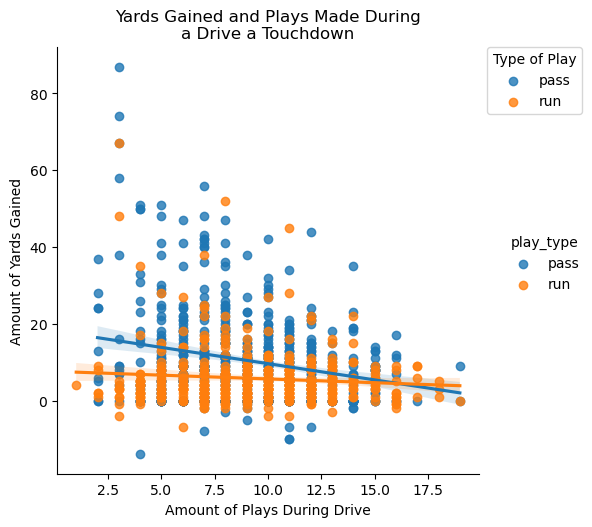

In [76]:
# Create scatterplot
sns.lmplot(data = touchdown_plays, 
                x = 'drive_play_count', 
                y = 'yards',
                hue = 'play_type')
plt.xlabel('Amount of Plays During Drive')
plt.ylabel('Amount of Yards Gained')
plt.title('Yards Gained and Plays Made During\na Drive a Touchdown')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Type of Play')
plt.show()